# Regularisation with linear filters

To avoid amplification of noise, we need to regularise the inverse filter.

Wiener filter:

$$\widetilde{u}^\delta_\alpha = \mathcal{F}^{-1} \left(\frac{\widehat{k}^*\widehat{f}^\delta}{|\widehat{k}|^2 + \alpha |\widehat{r}|^2}\right),$$

where $\widehat{r}$ is the psf of the regularistation operator.

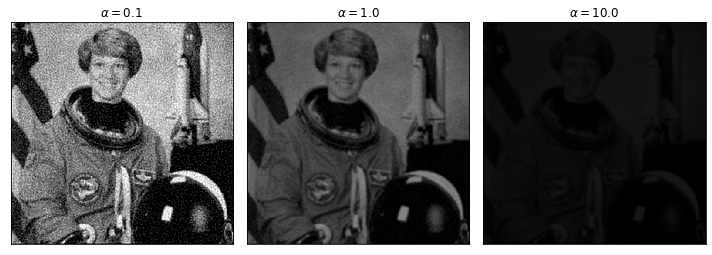

In [5]:
# read image
u = rgb2gray(data.astronaut())

# blur image
psf = np.ones((5, 5)) / 25
f = conv2(u, psf, 'same')

# add_noise
f_delta = random_noise(f, var = 0.01, clip=False)

# regularisation
reg_psf = np.zeros((5,5))
reg_psf[2,2] = 1

# apply inverse
alphas = [.1, 1.0, 10.0]
u_est = [0,0,0]
titles = [0,0,0]
for k in range(3):
    u_est[k] = wiener(f_delta, psf, reg = reg_psf, balance=alphas[k], clip=False) 
    titles[k] = r'$\alpha = $' + str(alphas[k])
# 
plot_images(u_est, titles, fname='decon_reg_id.png')

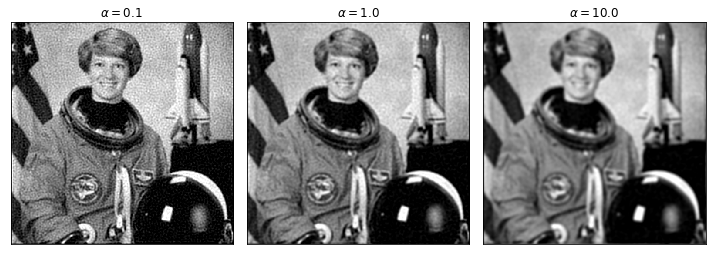

In [6]:
# read image
u = rgb2gray(data.astronaut())

# blur image
psf = np.ones((5, 5)) / 25
f = conv2(u, psf, 'same')

# add_noise
f_delta = random_noise(f, var = 0.01, clip=False)

# regularisation
reg_psf = np.array([[0,1,0],[1,-4,1],[0,1,0]])

# apply inverse
alphas = [.1, 1.0, 10.0]
u_est = [0,0,0]
titles = [0,0,0]
for k in range(3):
    u_est[k] = wiener(f_delta, psf, reg = reg_psf, balance=alphas[k], clip=False) 
    titles[k] = r'$\alpha = $' + str(alphas[k])
# 
plot_images(u_est, titles, fname='decon_reg_lap.png')

## $|\widehat{r}|^2 = 1$

![](decon_reg_id.png)

## $|\widehat{r}|^2 = |\xi|^2$

![](decon_reg_lap.png)

## Bias-variance trade-off

Regularisation reduces the influence of noise but introduces a bias.

$$\|u^\delta_\alpha - u\| \leq \|u^0_\alpha - u\| + \|u^\delta_\alpha - u^0_\alpha\|.$$

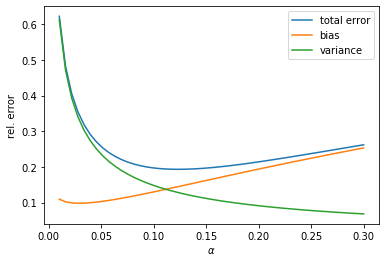

In [7]:
# read image
u = rgb2gray(data.astronaut())

# blur image
psf = np.ones((5, 5)) / 25
f = conv2(u, psf, 'same')

# add_noise
f_delta = random_noise(f, var = 0.01, clip=False)

# regularisation
reg_psf = np.array([[0,0,0],[0,1,0],[0,0,0]])

# apply inverse
ns = 50
alphas = np.linspace(.01,.3,ns)
error = np.zeros(ns)
bias = np.zeros(ns)
variance = np.zeros(ns)
for k in range(ns):
    u_delta_alpha = wiener(f_delta, psf, reg = reg_psf, balance=alphas[k], clip=False) 
    u_0_alpha = wiener(f, psf, reg = reg_psf, balance=alphas[k], clip=False)
    
    error[k] = np.linalg.norm(u_delta_alpha - u)/np.linalg.norm(u)
    bias[k] = np.linalg.norm(u_0_alpha - u)/np.linalg.norm(u)
    variance[k] = np.linalg.norm(u_0_alpha - u_delta_alpha)/np.linalg.norm(u)
# 
plt.plot(alphas,error,label='total error')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel('rel. error')
plt.savefig('bias_variance.png',dpi=300)

![](bias_variance.png)

## A variational framework

The above-mentioned regularisation methods can be cast as a least-squares problem

$$\min_u \frac{1}{2\delta^2}\|Ku - f^\delta\|^2 + \frac{1}{2\lambda^2} \|Ru\|^2,$$

with $\alpha = (\delta / \lambda)^2$.

This quadratic problem has a closed-form solution

$$\widetilde{u}^\delta_\alpha = \left(K^*\!K + \alpha R^*\!R\right)^{-1}K^*f^\delta.$$

## A statistical interpretation

The solution can be interpreted as the most likely one, under the assumption that 

* $f^\delta = Ku + \epsilon$, with $\epsilon \sim \mathcal{N}(0,\delta^2)$
* $u \sim \mathcal{N}(0,\lambda (R^*\!R)^{-1})$.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


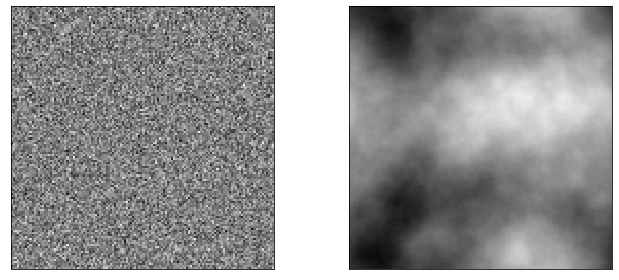

In [8]:
n = 128

# regularisation
reg_psf = np.array([[0,1,0],[1,-4,1],[0,1,0]])*n

# random image with diagonal covariance
u1 = .05*np.random.randn(n,n)

# random image with inverse Laplace covariance
z = np.random.randn(n,n)
u2 = K(z, psf = reg_psf, mode='pinv')
#
plot_images([u1,u2], ['',''], fname='bayesian.png', scale=[-.2,.2])

![](bayesian.png)

## Assignment: Richardson - Lucy